# Calculate the upper bound to accuracy on nested subsets of data.

This notebook shows that the upper bound to accuracy increases on subsets from 72% on the entire set to 85% on samples of size 2000.

In [1]:
import genre_data_loader, genre_upperbound, nested_subsets

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# get currrent date for latest version of data set
%store -r now

X_path_train = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_train_{}.csv'.format(now)
y_path_train = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_train_{}.csv'.format(now)
X_path_test = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_X_test_{}.csv'.format(now)
y_path_test = '/Users/Daniel/Code/Genre/data/genre_lists/data_ready_for_model/wiki-kaggle_y_test_{}.csv'.format(now)

In [3]:
# call data loader script
genre_data = genre_data_loader.LoadGenreData(now, X_path_train = X_path_train, y_path_train = y_path_train, 
                                             X_path_test = X_path_test, y_path_test = y_path_test)

In [4]:
# load data with genre sets
data = genre_data.as_sets()
# create list of all genres
list_of_genres = genre_data.get_list_of_genres()

Let's evaluate on nested subsets using the NestedSubsets class:

In [5]:
def subset_runs_errors(data, percentage = .1, runs = 2):
    """
    Input:genre data, percentage=.1, runs=2.
    Output: DF with errors for runs and subsets; 
        mean and std over runs for each subset size
    """
    data = data
    percentage = percentage
    # initialize error DF
    err = pd.DataFrame(columns = [f'run_{i}' for i in range(runs)])
    err.columns.name = 'run'
    err.index.name = 'subset_size'
    for i in range(runs):
        subsets = nested_subsets.NestedSubsets(data, percentage = percentage)
        sample_size = subsets.sample_size # get size of first subsample (=full set)
        for subset in subsets:
            if sample_size > subsets.remainder_size:
                error = genre_upperbound.UpperBound(subset)[1] 
                err.at[sample_size,f'run_{i}'] = error
                sample_size = subsets.sample_size
            else:
                break
    err['mean'] = err.mean(axis = 1)
    err['std'] = err.std(axis = 1)
    return err

In [6]:
err = subset_runs_errors(data,.1,10)

In [7]:
runs = 10
acc = 1- err[[f'run_{i}' for i in range(runs)]+['mean']]
acc['std'] = acc.std(axis = 1)

In [8]:
acc

run,run_0,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,mean,std
subset_size,,,,,,,,,,,,
15470,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,0.861409,1.110223e-16
13923,0.863392,0.86332,0.862601,0.86332,0.862171,0.862171,0.862817,0.865187,0.863822,0.860447,0.862925,1.176671e-03
12376,0.866031,0.865142,0.863688,0.866193,0.865142,0.863203,0.864496,0.868374,0.865142,0.862637,0.865005,1.572218e-03
10829,0.869702,0.866839,0.865269,0.866377,0.869055,0.865639,0.868317,0.872841,0.868132,0.865269,0.867744,2.266732e-03
9282,0.872334,0.869425,0.865977,0.870179,0.872549,0.868994,0.871148,0.876104,0.869101,0.868994,0.870480,2.599853e-03
7735,0.873432,0.875501,0.870588,0.874596,0.875113,0.870976,0.874079,0.880543,0.872398,0.870588,0.873781,2.854878e-03
6188,0.876697,0.878151,0.873465,0.875081,0.88009,0.876697,0.879121,0.885585,0.875566,0.876697,0.877715,3.201126e-03
4641,0.882784,0.889463,0.879121,0.882568,0.885154,0.886016,0.882784,0.892049,0.889248,0.879983,0.884917,4.051027e-03
3094,0.890756,0.899806,0.884939,0.887847,0.887524,0.894958,0.890433,0.898836,0.893665,0.888494,0.891726,4.710302e-03


In [9]:
err

run,run_0,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,mean,std
subset_size,,,,,,,,,,,,
15470,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,0.138591,2.775558e-17
13923,0.136608,0.13668,0.137399,0.13668,0.137829,0.137829,0.137183,0.134813,0.136178,0.139553,0.137075,1.176671e-03
12376,0.133969,0.134858,0.136312,0.133807,0.134858,0.136797,0.135504,0.131626,0.134858,0.137363,0.134995,1.572218e-03
10829,0.130298,0.133161,0.134731,0.133623,0.130945,0.134361,0.131683,0.127159,0.131868,0.134731,0.132256,2.266732e-03
9282,0.127666,0.130575,0.134023,0.129821,0.127451,0.131006,0.128852,0.123896,0.130899,0.131006,0.129519,2.599853e-03
7735,0.126568,0.124499,0.129412,0.125404,0.124887,0.129024,0.125921,0.119457,0.127602,0.129412,0.126219,2.854878e-03
6188,0.123303,0.121849,0.126535,0.124919,0.11991,0.123303,0.120879,0.114415,0.124434,0.123303,0.122285,3.201126e-03
4641,0.117216,0.110537,0.120879,0.117432,0.114846,0.113984,0.117216,0.107951,0.110752,0.120017,0.115083,4.051027e-03
3094,0.109244,0.100194,0.115061,0.112153,0.112476,0.105042,0.109567,0.101164,0.106335,0.111506,0.108274,4.710302e-03


Text(0, 0.5, 'errors')

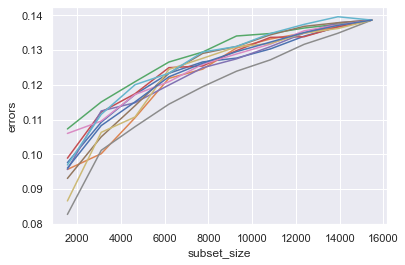

In [10]:
runs = 10
fig, ax = plt.subplots()
(err[[f'run_{i}' for i in range(runs)]+['mean']]).plot(use_index = True, ax = ax)
ax.legend().remove()
plt.ylabel('errors')

Text(0.5, 1.0, 'Upper bound to accuracy over 10 runs of nested subsets')

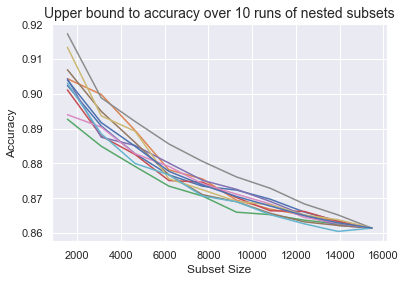

In [11]:
runs = 10
fig, ax = plt.subplots()
(acc[[f'run_{i}' for i in range(runs)]+['mean']]).plot(use_index = True, ax = ax)
ax.legend().remove()
plt.ylabel('Accuracy', fontsize = 12)
plt.xlabel('Subset Size', fontsize = 12)
plt.title('Upper bound to accuracy over 10 runs of nested subsets', fontsize = 14)

In [12]:
fig.savefig('/Users/Daniel/Code/Genre/visualizations/upperbound_curves.png', dpi = 144)